<a href="https://colab.research.google.com/github/Pondorasti/DS-2.1/blob/main/Slides/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principel Component Analysis (PCA)

- PCA is one of the well-known algorithm for Dimensionality Reduction

- PCA: 

    - Reduce the number of the features
    
    - While keeping the features information 
    
    - Removes correlations among features
    
    - PCA emphasizes variation of strong features, making the data easier to visualize
    

- Lets watch: https://www.youtube.com/watch?v=HMOI_lkzW08 (What is PCA?)

- Lets watch: https://www.youtube.com/watch?v=0GzMcUy7ZI0 (What is covariance matrix?)

- Lets watch: https://www.youtube.com/watch?v=Awcj447pYuk (How multiply matrix with vector?)



## Review matrix multiplication

- Matrix `A = np.array([[2, 0], [1, 5]])` and vector `v = np.array([3, 4])` are given.

- What is the multiplication of `A` by `v`.

- Compute it by hand

- Write a Python code to compute it (Hint: use `np.dot(A, v)`)



In [27]:
import numpy as np

A = np.array([[2, 0], [1, 5]])
v = np.array([3, 4])

print(np.dot(A, v))



[ 6 23]


## EigenValue and Eigenvector of matrix

For given matrix `A`, we are interested to obtain vector `v` and scalar value `a` such that:

`Av = av`

### Write a Python code to obtain vector v and scalar a for given matrix A 

In [28]:
eig_value, eig_vector = np.linalg.eig(A)

print(eig_value)
print(eig_vector)

[5. 2.]
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [29]:
np.dot(A, eig_vector[:, 0])

array([0., 5.])

In [30]:
eig_value[0]*eig_vector[:, 0]

array([0., 5.])

## Check that Av = av

In [31]:
np.dot(A, eig_vector[:, 1])

array([ 1.8973666 , -0.63245553])

In [32]:
eig_value[1]*eig_vector[:, 1]

array([ 1.8973666 , -0.63245553])

## Activity: Are the countries in great UK different in terms of food?

- In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK

- It would be great if we can visually represent diffrence among UK countries based on the food they eat 

- Lets read: http://setosa.io/ev/principal-component-analysis/

## Activity: Write a code that obtains the two principle components from 17 types of food in UK

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


df = pd.read_excel('https://raw.githubusercontent.com/Pondorasti/DS-2.1/main/Datasets/PCA%20(UK).xlsx')

X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Principle components of 17 features:
print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


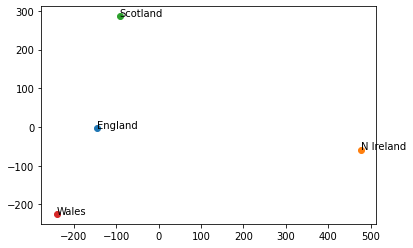

In [34]:
# Lets visualize the principle components

for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i+0.3, j+0.3, df.columns[:-1][k])

plt.show()

### Answer: Ireland is different from other three countries in UK 

## How much of the dataset information is preserved in the components?

Hint: use `pca.explained_variance_ratio_`

In [35]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


## Calculate the correlation of the principle components

In [36]:
import scipy
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(-1.6145741504003108e-18, 1.0)


## Lets write our own function to obtain principle components

### Activity: PCA Steps

Follow the steps here and write a function that computes the principle component for dataset we watched in YouTube.

https://www.youtube.com/watch?v=0GzMcUy7ZI0 

Steps: 

1- Subtract column mean from feature matrix

2- Calculate the covariance of centered matrix

3- Calculate the eigenvalue and eigenvector of covariance matrix. Do arange eigevalue in decresing order 

4- Return the first K (two for example) column of matrix multiplication of centerned matrix with eigenvector matrix

Compare the result of custom function with PCA in `sklearn`

In [37]:
# PCA computation by sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))


# Our function to comapre 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  X - M
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigendecomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    eig_value = eig_value[idx]
    # sort eigenvectors according to same index
    eig_vector = eig_vector[:, idx]
    P = np.dot(C, eig_vector)[:, :n_comp]
    return P


PCA_calculation(X, 2)

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.907625229796507e-16, 0.9999999999999996)
[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[ 1.65392786, -0.2775295 ],
       [ 0.84584087,  0.31153366],
       [-0.55130929,  0.09250983],
       [-1.94845944, -0.126514  ]])

In [38]:
def PCA_custom(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    # mean center the data
    data = data - np.mean(data, axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = np.linalg.eig(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:, idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T


print(PCA_custom(X, 2))

[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]
